

<center>
<h1>第五章：学习问题的建模分析（Modeling Learning Problems）</h1>
<h2>预测分析（Predictive Analytics）</h2>
<h3>中科大管理学院</h3>
</center> 

* The lecture is based on Chapter 1 in "Hands-on ML with scikit-learn and TensorFlow" by Aurelien Geron. All rights are reserved to Aurélien Geron and O'Reilly Media.
* Some of the figures in this presentation are taken from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani


# 本章概要

 
1. 回顾和加深机器学习概念
2. scikit-learn工具包简介

# 1. 机器学习（Machine Learning）

* 关注算法的设计、分析及应用，算法学习自经验
* 目标通常为“预测”或“影响决策”


* 示例: 垃圾邮件检测
<img src="images/spam.png" style="width: 80%;" >  



# 垃圾邮件检测: 传统方法
* 检测方法概述
    1. 研究垃圾邮件，刻画特定形式（patterns）（例如, 可疑词汇）
    2. 设计基于规则（rule-based）的算法，检测垃圾邮件
    3. 评测算法效果，重复上述1-2步骤直至算法效果符合要求 
    


* 什么样的算法可用于垃圾邮件监测? 

* 难点与挑战
    - 规则列表可能较为复杂
    - 需要定期更新（手动更新）
    - 垃圾邮件的特定形式可能难以刻画


# 垃圾邮件检测: ML方法

* 检测方法概述
    1. 收集垃圾邮件及非垃圾邮件的相关信息
    2. 利用数据训练ML算法 (遗传算法)
    3. 评价算法效果并进行修改


* 特点
    - 算法可能较为简短或易于维护（例如，语音识别，自动驾驶）
    - ML算法可以识别复杂的形式（non-trivial patterns）
    - 适用于不同环境    
    - 通用算法
        - 仅需输入数据及标签
        - ML算法能否独立于领域（domain-independent）?

# 例1: [Zillow](https://www.zillow.com)
* 在线房地产数据信息公司
* 数据涵盖全美110M房产
* 搜索房产信息，进行房产的买卖及租赁交易
* “Zestimate®” – 估计房产市场价值

<!--img src="images/zillow1.png" style="width: 400px; display: inline-block;"  /-->  

<!--img src="images/zillow2.png" style="width: 400px; display: inline-block;"  /-->  

<img src="images/zillow1.png" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="images/zillow2.png" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;">


# Zillow示例.

* Zillow需要使用哪种数据?
* 预测的对象是什么? 

* 回归分析问题

# 例2: D2Hawkeye

* 医疗解决方案的提供商（分析报告及数据挖掘）
* 对重要的医疗系统管理相关问题进行预测分析 
* 估计心脏病发作的风险问题


## 心脏病问题

* 根据2012年美国心脏协会的预测数据显示，每年美国心脏病发作的病人约 715,000 位
* 近半数的心脏病发作没有预警信号
* 对心脏病发作的风险进行估计
* 该企业的目标是什么？所需数据包括哪些？? 


 * 
    - 目标 - 预测心脏病的发生 – 至emergency room接受治疗，并转入院 	
    - 门诊数据 – 数据量庞大，但难以获及（结构混乱、不可获得、数据缺失）
    - 索赔数据 – 索赔类型，提供商，诊断代码，特殊性，金额，...

* 分类问题


# 例3: 在线广告
<img src="images/nytimes.png" style="float: right; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">
* 在线广告是网站的主要收益来源
* 占Google总收益的90% 
* 2015年，美国网络广告总收益超过 59.6B\$ 
* 核心运作决策: 用户与广告的匹配
    * 广告有效性
    * 刻画为点击率、转化率等



## 在线广告 (简化形式)

<img src="images/ad-diagram.png" style="width: 45%;">
<!--img src="images/ad-diagram.png" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;"-->

* 如何匹配用户与广告？
    - 预测点击概率
    - 优化
    - 让市场进行决策

* 市场细分
    * 将顾客区分为多种类别
    * 网页浏览形式的相似性(浏览内容，频次，时间\[time of the day\]以及IP地址 
* 在市场营销中存在很多应用实例

* 聚类分析

# 在线广告 ([Improve Digital](http://www.improvedigital.com/market-map/))

<center><img src="images/display ad eco.png" style="width: 60%;"></center>

# 难点与挑战
* 问题类型多: 回归，分类，聚类
* 领域多：房地产，在线广告，医疗
* 能否设计不依赖于领域的算法？ 

# 2. 建模 

* 不同领域存在不同的实用实例：制造业（预见性维护），金融业（信用风险），能源业（电力使用）， ... 
* ML提供了一个统一的框架从数据中抽取信息进行学习

|$X_1$|$X_2$|...|$X_n$|$Y$|
|-|-|-|-|
|$x^{(1)}_{1}$|$x^{(1)}_{2}$|...|$x^{(1)}_{n}$|$y^{(1)}$|
|$x^{(2)}_{1}$|$x^{(2)}_{2}$|...|$x^{(2)}_{n}$|$y^{(2)}$|
|...|...|...|...|...|
|$x^{(m)}_{1}$|$x^{(m)}_{2}$|...|$x^{(m)}_{n}$|$y^{(m)}$|

* $m$ 样本 samples/instances/data points/observations: $x^{(1)},...,x^{(m)}$ 
* $n$ 特征 features/input variables/independent variables: $X_1,...,X_n$
* 输出 variable/dependent variable/response variable/label: $Y$
* 目标: estimate a mapping $\tilde{Y}=h(X)$


# ML问题的分类

|$X_1$|$X_2$|...|$X_n$|$Y$|
|-|-|-|-|
|$x^{(1)}_{1}$|$x^{(1)}_{2}$|...|$x^{(1)}_{n}$|$y^{(1)}$|
|$x^{(2)}_{1}$|$x^{(2)}_{2}$|...|$x^{(2)}_{n}$|$y^{(2)}$|
|...|...|...|...|...|
|$x^{(m)}_{1}$|$x^{(m)}_{2}$|...|$x^{(m)}_{n}$|$y^{(m)}$|

* 监督学习 Supervised learning – predict Y for a new value of X (classification, regression)
* 无监督学习 Unsupervised learning – find structure and relations within X (clustering, dimensionality reduction, association rules mining)
* 半监督学习 Semi-supervised learning - some observations are not labeled
* 主动学习 Active learning - labeling can be acquired for a price - 现实生活的很多场景中，标记样本的获取比较困难，需要领域内的专家进行人工标注，所花费的时间成本和经济成本都较大。主动学习允许使用少量的训练样本来获得性能较好的分类器，通过一定的算法查询最有用的未标记样本，并交由专家进行标记，然后用查询到的样本训练分类模型
* 强化学习 Reinforcement learning - an agent obtains rewards by taking actions - 马尔科夫决策过程，与动态规划与优化问题紧密相关

# 练习1

建立一个学习模型用于预测航班延误 
1. 可以使用那些特征？ 
2. 输出变量是什么？
3. 问题的类型是什么？(supervised/unsupervised/classification/regression)
4. 想获取多少观测量？ (order of magnitude)
5. 建立一个具有3个观测值及4种特征的样本数据矩阵

# 模型

* 数学模型定义了输入变量和输出变量之间的对应关系
* 参数类: 
    - 建立数据表达式以进行预测分析
    - 无需具体数据进行预测
    - 例如
        - 鉴别函数
        - 概率
   
* 非参类
    - 需要具体的数据进行预测分析（变量结构，参数数量）
        

* 总结：至今，我们宏观地介绍了模型的用处，之后将具体讨论如何使用模型达到目的

# 3. [scikit-learn](http://scikit-learn.org/stable/)

* Python的机器学习库
* 开源
* 与numpy, scipy and matplotlib联合使用
* 包含多种内容: classification, regression, clustering, model selection, pre-processing
* 样本数据链接 [datasets](http://scikit-learn.org/stable/datasets/index.html)

# Iris数据集

* 模式识别方面最著名的数据集
* 包含3类iris flowers，共150株花束的信息
* 4种特征: 花瓣、萼片、长度、宽度
* 输出变量：iris的类别（3类之一）
* 目标: 通过花瓣、萼片预测花束种类

<center><h6><img src="images/iris.png" style="width: 40%;">Source: Hands-on ML with scikit-learn and TensorFlow by Aurelien Geron</h6></center>






## 利用scikit-learn进行数据加载

In [1]:
%matplotlib inline 
from IPython.core.pylabtools import figsize
figsize(14, 7) 

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets # import dataset module
iris = datasets.load_iris()  # load iris dataset 
iris.keys()                  # explore returned object
# http://scikit-learn.org/stable/datasets.html

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
iris['DESCR']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Iris数据集

In [4]:
import pprint # module for formatted printing
pprint.pprint(iris['DESCR']) 

('.. _iris_dataset:\n'
 '\n'
 'Iris plants dataset\n'
 '--------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 150 (50 in each of three classes)\n'
 '    :Number of Attributes: 4 numeric, predictive attributes and the class\n'
 '    :Attribute Information:\n'
 '        - sepal length in cm\n'
 '        - sepal width in cm\n'
 '        - petal length in cm\n'
 '        - petal width in cm\n'
 '        - class:\n'
 '                - Iris-Setosa\n'
 '                - Iris-Versicolour\n'
 '                - Iris-Virginica\n'
 '                \n'
 '    :Summary Statistics:\n'
 '\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '                    Min  Max   Mean    SD   Class Correlation\n'
 '    ============== ==== ==== ======= ===== ====================\n'
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826\n'
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n'
 '    petal length:   1.0  6.9   3.76   1.76    

## Iris数据集

In [5]:
X = iris['data']       # data matrix
y = iris['target']     # output values
print(type(X),type(y)) # display data types

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(X.shape, y.shape) # dataset size

In [ ]:
X[:3,:] # print first 3 rows

In [ ]:
iris['feature_names'] # feature names

In [ ]:
y[:3] # print first 3 labels

In [ ]:
iris['target_names'] # display label of each class value {0,1,2}->{setosa,versicolor, virginica}

## Visualization

In [9]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['class'] = iris['target']
df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.plot.scatter(x='petal length (cm)',y='petal width (cm)', c='class', colormap='tab20b', sharex=False)

## 分类问题-两类
* 首先考虑某个观测对象属于两类中的某一个
* 即，建立模型，判断观测对象的类别（class 1 vs class 2）

In [12]:
df_12_only = df[df['class']!=0]
df_12_only

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df_12_only.plot.scatter(x='petal length (cm)',y='petal width (cm)', c='class', colormap='tab20b')

# 4. scikit learn中的训练模型: KNN
* k-nearest neighbors
* 根据K个最近的数据点对新的数据点进行分类

<center><img src="images/2.14.png" style="width: 50%;"></center>

* 这个模型属于非参？判别函数？概率生成？

## KNN - 示例

In [15]:
from sklearn import neighbors                            # import the KNN classifier
clf = neighbors.KNeighborsClassifier(1)                  # intialize classifier with K=1
X = df_12_only[['petal length (cm)','petal width (cm)']] # use only two features for prediction
Y = df_12_only['class']
clf.fit(X, Y) # train classifer with data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

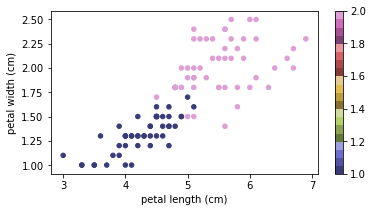

In [16]:
X.plot.scatter(x='petal length (cm)',y='petal width (cm)', c=Y, colormap='tab20b', figsize=(6,3), sharex=False) # reminder

In [17]:
clf.predict([[0,0]]) # make prediction

array([1])

In [18]:
clf.predict([[10,10]]) # make prediction

array([2])

### 决策边界




In [19]:
from tools import * # the file tools.py contains the function plot_decision_boundary_2d()

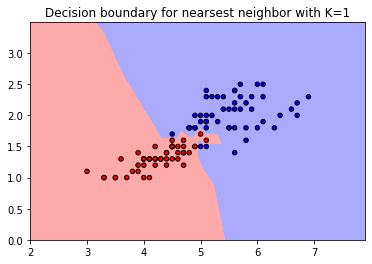

In [20]:
plot_decision_boundary_2d(df=X, Y=Y, clf=clf, title='Decision boundary for nearsest neighbor with K=1')

观测图形可知：
- 训练无误差
- 边界附近存在过拟合问题

### 决策树

<center><img src="images/8.1.png" style="width: 30%;"></center>

### 示例: 决策树在iris数据集上的应用

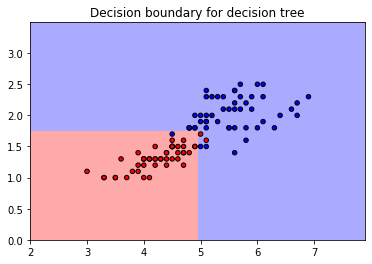

In [21]:
from sklearn import tree                         # import the decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=2)   # intialize tree, set maximal depth 2
clf.fit(X, Y)                                    # train classifer
plot_decision_boundary_2d(df=X,Y=Y, clf=clf, title='Decision boundary for decision tree')

* 决策边界特点：线性
* 存在一定训练误差

### 决策树的可视化（可跳过）

In [ ]:
import pydot_ng as pydot # installation instructions are available in homework 0
with open("images/tree.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f, feature_names=X.columns, filled=True, label='all') 
pydot.graph_from_dot_file('images/tree.dot').write_pdf('images/tree.pdf') 

In [ ]:
from IPython.display import IFrame
IFrame("images/tree.pdf", width=800, height=300)

# 逻辑回归

* 直接估计观测对象$(x_1,...,x_n)$属于某个分类的概率

<center><big>
$Prob(Y=1)=\frac{1}{1+exp(-(\theta_1x_1 + \theta_2x_2 + ...  +\theta_nx_n))}$ 
</big>
</center>

* Predict Y=1 if $Prob(Y=1)>0.5$, otherwise predict Y=0

F:\Jupyter\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


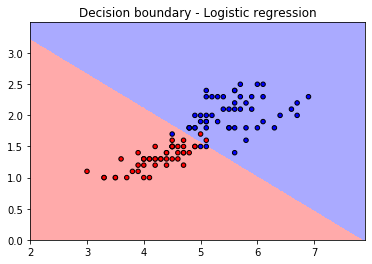

In [23]:
from sklearn import linear_model                 # import package
clf = linear_model.LogisticRegression(C=10**10)  # intialize Logistic Regression model
clf.fit(X, Y)                                    # train classifer with data
plot_decision_boundary_2d(df=X,Y=Y, clf=clf, title='Decision boundary - Logistic regression') # plot

### LDA - Linear discriminant analysis

* 假定每个类中的数据点都服从正态分布
* 用数据拟合分布参数
* [Example](http://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html)

<center><img src="images/LDA.png" style="width: 20%;"></center>


### 示例: LDA在iris数据集上的应用

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # import package
clf = LinearDiscriminantAnalysis()                                   # intialize LDA
clf.fit(X, Y)                                                        # train classifer with data
plot_decision_boundary_2d(df=X,Y=Y, clf=clf, title='Decision boundary - LDA') # plot

* 依旧是线性模型，但有别于逻辑回归

# 5. 机器学习方法的主要挑战

* 数据不充足
* 数据不具备代表性
* 数据质量差
* 特征不相关
* 训练数据欠拟合
* 训练数据过拟合


# 6. ML问题的特点及求解

* 须对问题进行分类
* 模型大致可分为两种类型: 非参类, 参数类 (依赖于模型): 判别函数、概率生成
* 如何评价系统的表现？ 
* 优化 
    - 以逻辑回归为例: <big>$Prob(Y=1)=\frac{1}{1+exp(-(\theta_1x_1 + \theta_2x_2 + ...  \theta_nx_n))}$ </big>
    - 如何确定$\theta_1,\ldots,\theta_n$的值?
    - 运用算法: 如何优化？offline vs. online learning

# 练习2



数据集: [Link 1](http://archive.ics.uci.edu/ml/datasets/Wine), [Link 2](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

1. 加载Wine dataset，and print the description
2. 初始化输入和输入变量 X 及 y
3. Print the dimensions (shape) of X and y
4. Print the feature names
5. Print the label names
6. 拟合一个 KNN 分类器 (K=1),计算预测准确度 (percentage of correctly classified observations)
7. 重复第六步, 拟合a logistic regression model, support vector machines, linear discriminant analysis, gaussian naive bayes, decision tree, random forests, and neural network with 2 hidden layers each with 5 nodes.  
8. 第七步之后，请选取一个结果最准确的模型  

可参考如下文件 
http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

___
<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

## Solution

In [ ]:
# 1. Load the Wine dataset and print the description
wine = datasets.load_wine()  
pprint.pprint(wine['DESCR']) 

In [ ]:
# 2. Initialize the input and output variables
X = wine['data']      
y = wine['target']     

## Solution - cont.

In [ ]:
# 3. Print the diemnsions of X and y
print(X.shape, y.shape) 

In [ ]:
# 4. print feature names
print(wine['feature_names'])

In [ ]:
# print label names
print(wine['target_names'])

In [ ]:
# fit a KNN classifier to the entire dataset
clf = neighbors.KNeighborsClassifier(1)               
clf.fit(X, y) 

## Solution - cont.

In [ ]:
# compute accuracy - the number of correctly classified observations
n = len(y)
accuracy = sum(clf.predict(X)==y)/n
print(accuracy)

In [ ]:
# built-in function for computing accuracy
clf.score(X,y)

In [ ]:
# another way
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

In [ ]:
clf = linear_model.LogisticRegression() 
clf.fit(X, y)     
clf.score(X,y)

In [ ]:
clf = svm.SVC()
clf.fit(X, y)  
clf.score(X,y)

## Solution - cont.

In [ ]:
clf = LinearDiscriminantAnalysis()                                 
clf.fit(X, y)  
clf.score(X,y)

In [ ]:
clf = GaussianNB()
clf.fit(X, y)  
clf.score(X,y)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)  
clf.score(X,y)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X, y)
clf.score(X,y)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5, 5))
clf.fit(X, y)
clf.score(X,y)

## 现象 - SKlearn
* 简单且功能强大的接口
* 函数调取具有一致性(initialize, fit, compute score and predict)
* 完整的辅助文档及示例
* 运行速度较快 (至少对小型数据集而言)


## 讨论
1. 仅根据训练数据选择模型是不合理的
    - use validation set for model selection
    - use test set for final evaluation
2. 算法可以基于不同参数值
    - E.g., KNN with K=1,2,...
    - Very different behavior
    - Good idea to explore different parameters (hyper-parameter tuning). Requires understanding of the model.
3. 对分类问题而言，准确性不一定是最优的衡量分类器表现的标准

## 讨论
4.另一个好的方案是在拟合模型前先对数据进行探索分析
- 数据可能需要清理
- 某些特征可以进行变换 (e.g., text to numerical values)
- 特征的scale（成比例的放大或缩小） (algorithms may be sensitive to scale)
- 增加或者移除某些特征可能对模型表现造成非常大的影响

5.尽可能让模型自动化运作

6.操作文档化 - 随时记录下模型里面使用的假设以及曾经尝试过的模型

# 总结
* ML vs. 传统方案 (以垃圾邮件过滤问题为例)
* 建模
* ML问题的特点
    * 问题的类别 (supervised,unsupervised,...)
    * 模型的类别 (non-parameteric, parametric, probabilistic, ...)
    * 模型表现的衡量
    * 模型参数的优化 
* Scikit learn